# Horizontal plots

- order: 8

In DABEST version xx.xx.xx, we introduce a new plotting orientation: **horizontal plots**. 

This is useful when you have a large number of groups, and you want to save space on the x-axis (or just would prefer a different layout!). 

To access this, provide `horizontal=True` to the `plot` method.

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2024.03.29


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore") # to suppress warnings related to points not being able to be plotted due to dot size

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                 'Control 2' : c2,     'Test 2' : t2,
                 'Control 3' : c3,     'Test 3' : t3,
                 'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                 'Gender'    : gender, 'ID'  : id_col
                })

## Swarmplots


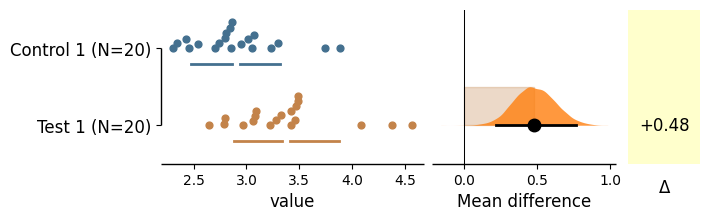

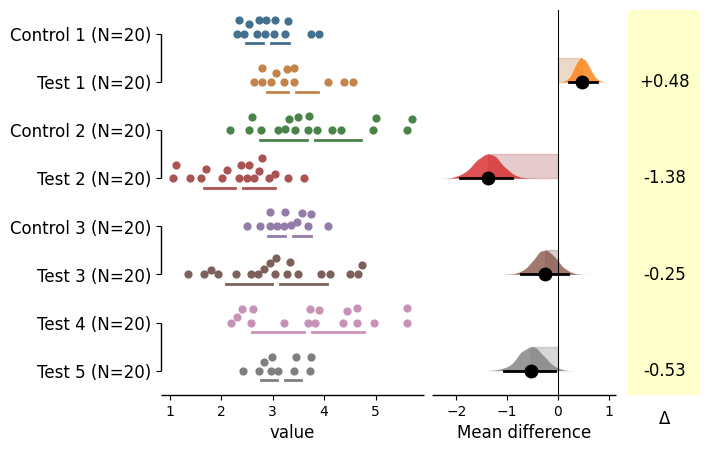

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), resamples=5000)
two_groups_unpaired.mean_diff.plot(horizontal=True);

multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3"),("Test 4", "Test 5")))
multi_2group.mean_diff.plot(horizontal=True);

## Repeated Measures


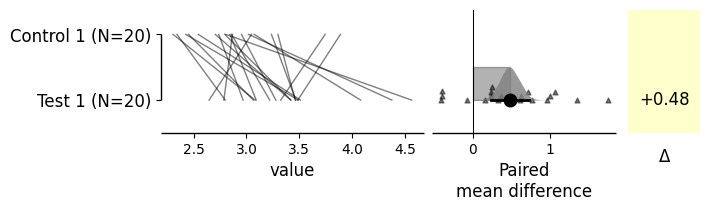

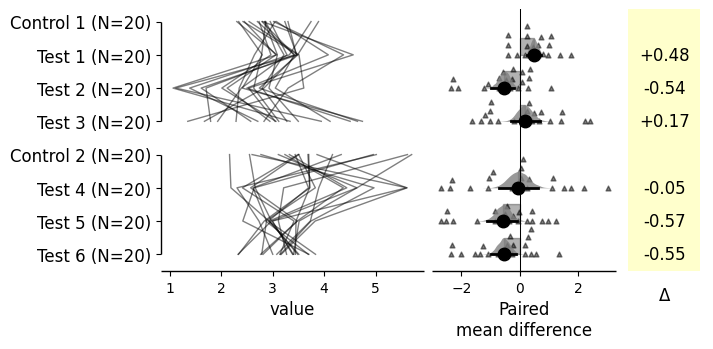

In [ ]:
multi_baseline_repeated_measures = dabest.load(df, idx=("Control 1", "Test 1",),paired="baseline", id_col="ID")
multi_baseline_repeated_measures.mean_diff.plot(horizontal=True,);

multi_baseline_repeated_measures = dabest.load(df, idx=(("Control 1", "Test 1", "Test 2", "Test 3"),("Control 2", "Test 4", "Test 5", "Test 6")),paired="baseline", id_col="ID")
multi_baseline_repeated_measures.mean_diff.plot(horizontal=True,);

## Proportion plots - Barplots and Sankey diagrams


In [ ]:
def create_demo_prop_dataset(seed=9999, N=40):
    import numpy as np
    import pandas as pd

    np.random.seed(9999)  # Fix the seed to ensure reproducibility of results.
    # Create samples
    n = 1
    c1 = np.random.binomial(n, 0.2, size=N)
    c2 = np.random.binomial(n, 0.2, size=N)
    c3 = np.random.binomial(n, 0.8, size=N)

    t1 = np.random.binomial(n, 0.6, size=N)
    t2 = np.random.binomial(n, 0.2, size=N)
    t3 = np.random.binomial(n, 0.3, size=N)
    t4 = np.random.binomial(n, 0.4, size=N)
    t5 = np.random.binomial(n, 0.5, size=N)
    t6 = np.random.binomial(n, 0.6, size=N)
    t7 = np.ones(N)
    t8 = np.zeros(N)
    t9 = np.zeros(N)

    # Add a `gender` column for coloring the data.
    females = np.repeat('Female', N / 2).tolist()
    males = np.repeat('Male', N / 2).tolist()
    gender = females + males

    # Add an `id` column for paired data plotting.
    id_col = pd.Series(range(1, N + 1))

    # Combine samples and gender into a DataFrame.
    df = pd.DataFrame({'Control 1': c1, 'Test 1': t1,
                       'Control 2': c2, 'Test 2': t2,
                       'Control 3': c3, 'Test 3': t3,
                       'Test 4': t4, 'Test 5': t5, 'Test 6': t6,
                       'Test 7': t7, 'Test 8': t8, 'Test 9': t9,
                       'Gender': gender, 'ID': id_col
                       })

    return df
df_prop = create_demo_prop_dataset()

### Barplots


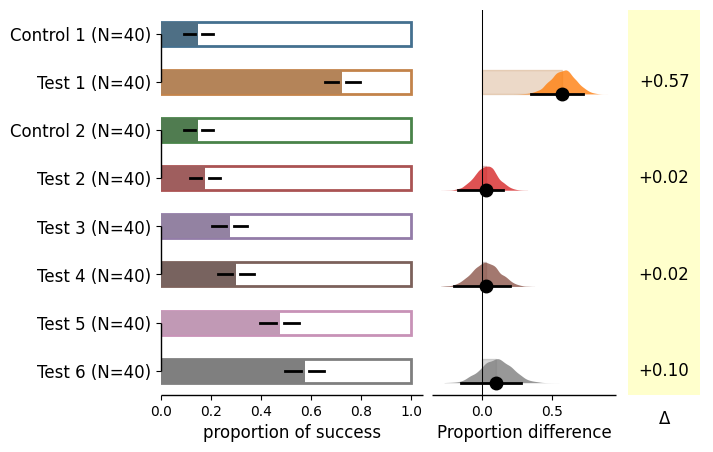

In [ ]:
two_groups_unpaired = dabest.load(df_prop, idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Test 3", "Test 4"), ("Test 5", "Test 6")), proportional=True)
two_groups_unpaired.mean_diff.plot(horizontal=True);

### Sankey diagrams


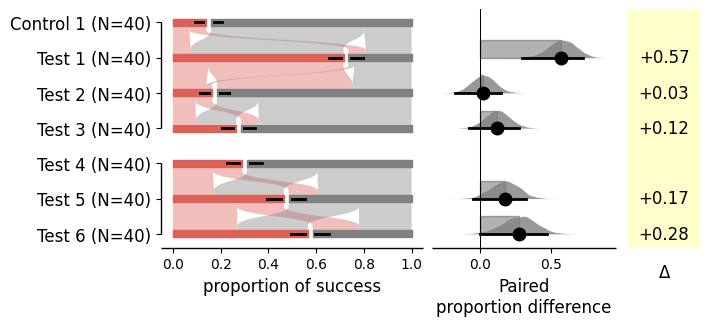

In [ ]:
multi_group_baseline = dabest.load(df_prop, idx=((("Control 1", "Test 1","Test 2", "Test 3"),("Test 4", "Test 5", "Test 6"))),proportional=True, paired="baseline", id_col="ID")
multi_group_baseline.mean_diff.plot(horizontal=True);

## Delta-delta

In [ ]:
from scipy.stats import norm # Used in generation of populations.
np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

# Create samples
N = 20
y = norm.rvs(loc=3, scale=0.4, size=N*4)
y[N:2*N] = y[N:2*N]+1
y[2*N:3*N] = y[2*N:3*N]-0.5

# Add a `Treatment` column
t1 = np.repeat('Placebo', N*2).tolist()
t2 = np.repeat('Drug', N*2).tolist()
treatment = t1 + t2 

# Add a `Rep` column as the first variable for the 2 replicates of experiments done
rep = []
for i in range(N*2):
    rep.append('Rep1')
    rep.append('Rep2')

# Add a `Genotype` column as the second variable
wt = np.repeat('W', N).tolist()
mt = np.repeat('M', N).tolist()
wt2 = np.repeat('W', N).tolist()
mt2 = np.repeat('M', N).tolist()


genotype = wt + mt + wt2 + mt2

# Add an `id` column for paired data plotting.
id = list(range(0, N*2))
id_col = id + id 


# Combine all columns into a DataFrame.
df_delta2 = pd.DataFrame({'ID'        : id_col,
                  'Rep'      : rep,
                   'Genotype'  : genotype, 
                   'Treatment': treatment,
                   'Y'         : y
                })

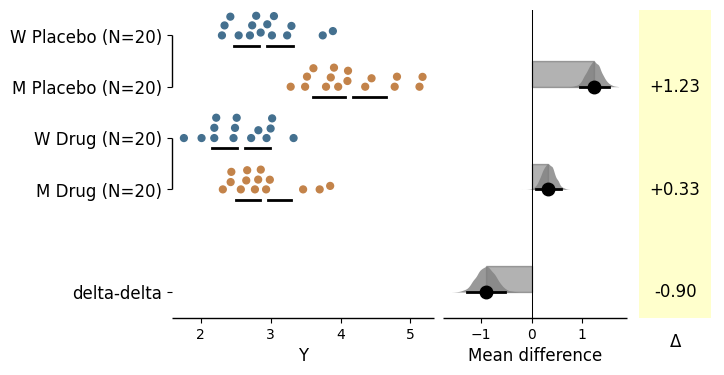

In [ ]:
unpaired_delta2 = dabest.load(data = df_delta2, x = ["Genotype", "Genotype"], y = "Y", delta2 = True, experiment = "Treatment")
unpaired_delta2.mean_diff.plot(horizontal=True);

## Mini-Meta

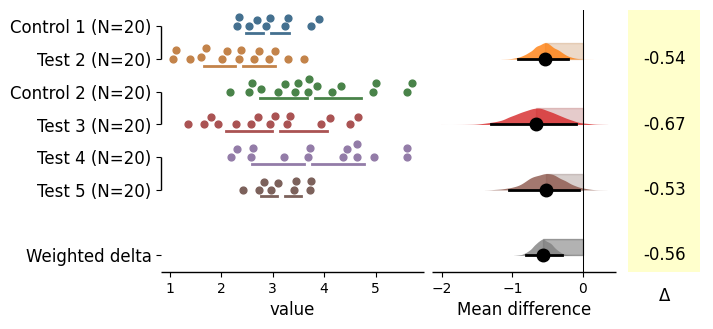

In [ ]:
unpaired = dabest.load(df, idx=(("Control 1", "Test 2"), ("Control 2", "Test 3"), ("Test 4", "Test 5")), mini_meta=True)
unpaired.mean_diff.plot(horizontal=True);

## Aesthetic options

As with the vertical plots, horizontal plots can be customized using the same options. 

Shown below are a few cases where the aesthetics are modified, added functionality, or just less intuitive.

### Swarm Side

As with the vertical plots, you can specify the side of the swarms via `swarm_side` in the `plot()` function. 

In this case, `swarm_side='left'` would plot the swarms upwards, and `swarm_side='right'` would plot the swarms downwards.

Default is `swarm_side='left'`

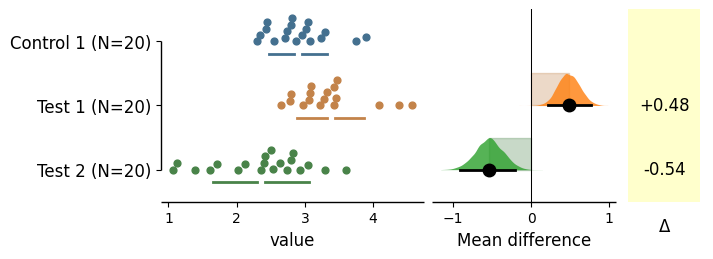

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1", 'Test 2'), resamples=5000)
two_groups_unpaired.mean_diff.plot(swarm_side='left', horizontal=True);

`swarm_side='center'`

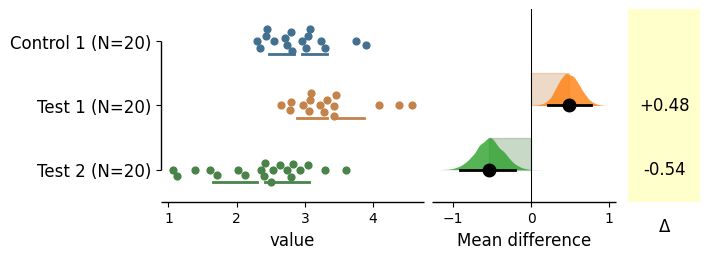

In [ ]:
two_groups_unpaired.mean_diff.plot(swarm_side='center', horizontal=True);

`swarm_side='right'`

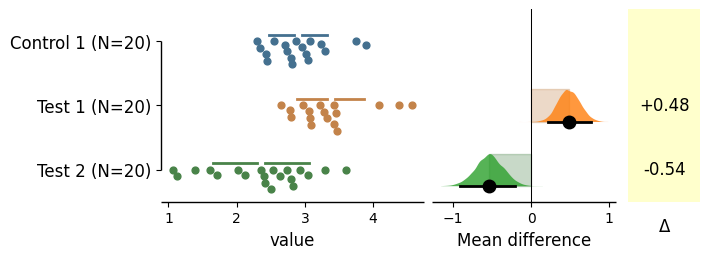

In [ ]:
two_groups_unpaired.mean_diff.plot(swarm_side='right', horizontal=True);

### Table Kwargs

The table axis can be customized using the `horizontal_table_kwargs` argument. A dict of keywords can be passed to customize the table. 

If None, the following keywords are passed:

- 'show' : True
- 'color' : 'yellow', 
- 'alpha' :0.2, 
- 'fontsize' : 12, 
- 'text_color' : 'black', 
- 'text_units' : None, 
- 'paired_gap_dashes' : False, 
- 'fontsize_label': 12, 
- 'label': 'Δ'

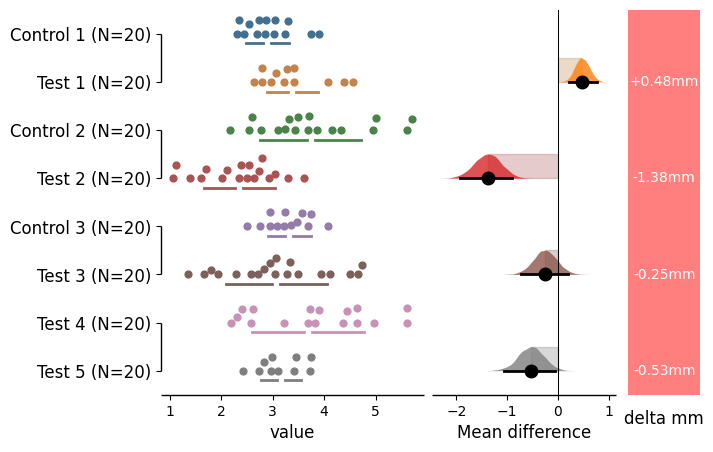

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3"),("Test 4", "Test 5")))
multi_2group.mean_diff.plot(horizontal=True, horizontal_table_kwargs={'color': 'red', 
                                                                      'alpha': 0.5, 
                                                                      'text_color': 
                                                                      'white',
                                                                      'text_units':'mm', 
                                                                      'label': 'delta mm'
                                                                      });

The table axis can be hidden using the `'show':False` in the `horizontal_table_kwargs` dict.

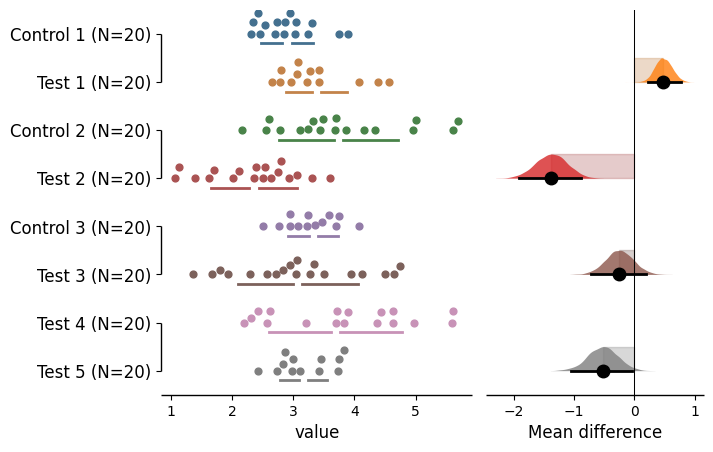

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3"),("Test 4", "Test 5")))
multi_2group.mean_diff.plot(horizontal=True, horizontal_table_kwargs={'show': False, });

### Gridkey 

As with the vertical plots, you can utilise a gridkey format for representing the groupings. This can be reached via `gridkey_rows` in the `plot()` function. 

You can either use `gridkey_rows='auto'` to automatically generate the gridkey, or pass a list of indexes to represent the groupings (e.g., `gridkey_rows=['Control', 'Test']`).

See the examples in plot_aesthetics for more information with regards to kwargs.

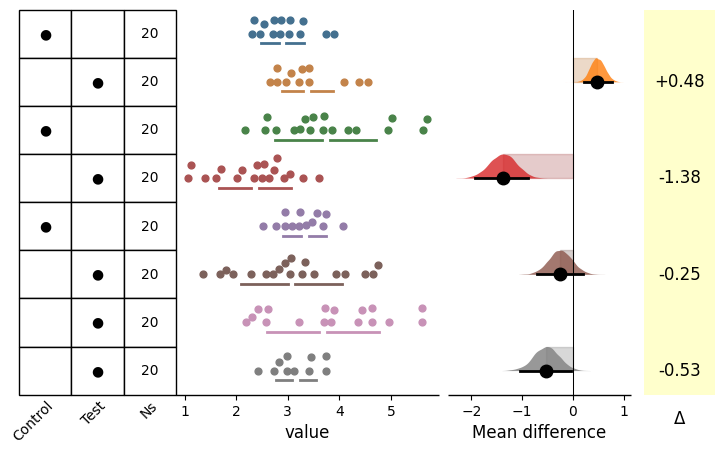

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3"),("Test 4", "Test 5")))
multi_2group.mean_diff.plot(horizontal=True, gridkey_rows=['Control', 'Test']);